In [2]:
import pandas as pd
import networkx as nx

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
file = ['round1_ijcai_18_train_20180301.txt', 'round1_ijcai_18_test_a_20180301.txt', 'round1_ijcai_18_test_b_20180418.txt']
    
train = pd.read_csv(wd+file[0], sep=" ")
test_a = pd.read_csv(wd+file[1], sep=" ")
test_b = pd.read_csv(wd+file[2], sep=" ")
data = pd.concat([train, test_a, test_b])

In [3]:
G_ui = nx.from_pandas_edgelist(df=data, source='user_id', target='item_id', edge_attr='is_trade', create_using=nx.MultiGraph())
print('Number of nodes: ', len(G_ui.nodes()),
      '\nNumber of edges: ', len(G_ui.edges()))

Number of nodes:  230301 
Number of edges:  539397


In [4]:
# find node with largest degree
node_and_degree = G_ui.degree()

In [15]:
from operator import itemgetter

(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

In [16]:
hub_ego = nx.ego_graph(G_ui, largest_hub)

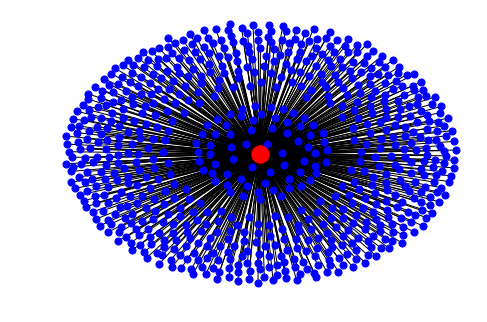

In [17]:
import matplotlib.pyplot as plt

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
# Draw ego as large and red
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
plt.show()

In [14]:
pagerank = pd.DataFrame(list(nx.pagerank(G_ui).items()), columns=['node', 'pagerank'])

NetworkXNotImplemented: not implemented for multigraph type

In [7]:
pagerank.sort_values(by='pagerank', ascending=False).head(10)

,node,pagerank
5125,2986722878397696833,0.002637
12668,7571023501622243456,0.002617
3607,2079092401639430105,0.002258
2106,5410526681843914464,0.002019
2104,2709839111509701702,0.001858
22123,3444647220397515150,0.001829
8156,2723541945574109807,0.001732
2111,5467735841796001072,0.001638
6984,4817583173619024436,0.001637
6229,5716046650492250518,0.001597


In [8]:
pagerank.sort_values(by='pagerank').head(10)

,node,pagerank
98388,24222185012217158,0.000001
41547,8759842124911384433,0.000001
97190,3205492315166273205,0.000001
90929,1992790623956190566,0.000001
186302,8303645670032645155,0.000001
183202,1104228521562445968,0.000001
202210,1725407837106771286,0.000001
207570,2345938252624504534,0.000001
181767,5004302025107299367,0.000001
155317,7480141975494303092,0.000001


In [11]:
data = data.merge(pagerank, left_on='user_id', right_on='node', how='left').merge(pagerank, left_on='item_id', right_on='node', how='left')

In [12]:
data.columns

Index(['context_id', 'context_page_id', 'context_timestamp', 'instance_id',
       'is_trade', 'item_brand_id', 'item_category_list', 'item_city_id',
       'item_collected_level', 'item_id', 'item_price_level',
       'item_property_list', 'item_pv_level', 'item_sales_level',
       'predict_category_property', 'shop_id', 'shop_review_num_level',
       'shop_review_positive_rate', 'shop_score_delivery',
       'shop_score_description', 'shop_score_service', 'shop_star_level',
       'user_age_level', 'user_gender_id', 'user_id', 'user_occupation_id',
       'user_star_level', 'node_x', 'pagerank_x', 'node_y', 'pagerank_y'],
      dtype='object')

In [16]:
pagerank_data = pd.DataFrame(columns=['instance_id', 'user_pagerank', 'item_pagerank'])
pagerank_data['instance_id'] = data['instance_id']
pagerank_data['user_pagerank'] = data['pagerank_x']
pagerank_data['item_pagerank'] = data['pagerank_y']

In [17]:
pagerank_data.head()

,instance_id,user_pagerank,item_pagerank
0,108641074714126964,0.000010,0.00002
1,5754713551599725161,0.000010,0.00002
2,842679481291040981,0.000003,0.00002
3,937088850059189027,0.000002,0.00002
4,7975697065017708072,0.000003,0.00002


In [19]:
pagerank_data.to_csv(wd+'pagerank.txt',  sep=' ')

In [11]:
test_data = data.head()

In [12]:
test_data

,context_id,context_page_id,context_timestamp,instance_id,is_trade,item_brand_id,item_category_list,item_city_id,item_collected_level,item_id,...,shop_review_positive_rate,shop_score_delivery,shop_score_description,shop_score_service,shop_star_level,user_age_level,user_gender_id,user_id,user_occupation_id,user_star_level
0,282924576738839389,4006,1537236544,108641074714126964,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,4,3412720377098676069,...,1.0,1.0,1.0,1.0,5002,1003,1,4505772604969228686,2005,3003
1,4007979028023783431,4001,1537243232,5754713551599725161,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,4,3412720377098676069,...,1.0,1.0,1.0,1.0,5002,1002,0,2692638157208937547,2005,3006
2,4884875192608989870,4001,1537211052,842679481291040981,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,4,3412720377098676069,...,1.0,1.0,1.0,1.0,5002,1003,0,5247924392014515924,2005,3004
3,840119421106178602,4016,1537222670,937088850059189027,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,4,3412720377098676069,...,1.0,1.0,1.0,1.0,5002,1004,1,2681414445369714628,2005,3006
4,1736769971710354684,4001,1537271320,7975697065017708072,0.0,1975590437749032870,7908382889764677758;5799347067982556520,3948283326616421003,4,3412720377098676069,...,1.0,1.0,1.0,1.0,5002,1002,0,2729475788342039013,2005,3001


AttributeError: ("'Series' object has no attribute 'user_id'", 'occurred at index context_id')